# Chapter 6. Financial Time Series

                      The only reason for time is so that everything doesn’t happen at once. — Albert Einstein

## 차례 

* pandas Basics
    * Frist Steps with DataFrame Class
    * Second Steps with DataFrame Class
    * Basic Analytics
    * Series Class
    * GroupBy Operations
* Financial Data
* Regression Analysis
* High-Frequency Data
* Conclusions

## pandas Basics

In a sense, pandas is built “on top” of NumPy. So, for example, NumPy universal functions
will generally work on pandas objects as well. We therefore import both to begin with:

In [156]:
import numpy as np
import pandas as pd

#### Frist Steps with DataFrame Class

In [157]:
df = pd.DataFrame([10, 20, 30, 40],columns=['numbers'],index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [158]:
df.index # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [159]:
df.columns # the column names

Index([u'numbers'], dtype='object')

In [160]:
df.ix['c'] # selection via index

numbers    30
Name: c, dtype: int64

In [161]:
df.ix[['a', 'd']] # selection of multiple indices

,numbers
a,10
d,40


In [162]:
df.ix[df.index[1:3]] # selection via Index object

,numbers
b,20
c,30


In [163]:
df.sum() # sum per column

numbers    100
dtype: int64

In [164]:
df.apply(lambda x: x ** 2) # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [165]:
df ** 2 # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [166]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [168]:
df['floats'] # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [169]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [170]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},ignore_index=True)  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [171]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [172]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],index=['a', 'b', 'c', 'd', 'y'],columns=['squares',]))  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
z,5.75,Henry,100,NaN


In [173]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],index=['a', 'b', 'c', 'd', 'y'],columns=['squares',]),how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
y,NaN,NaN,NaN,25
z,5.75,Henry,100,NaN


In [174]:
df[['numbers', 'squares']].mean()  # column-wise mean

numbers    40
squares    11
dtype: float64

In [175]:
df[['numbers', 'squares']].std()   # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

#### Second Steps with DataFrame Class

In [176]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 1.379943, -0.344468, -0.736452,  1.886392],
       [-0.319307,  1.818781,  1.683143,  0.600998],
       [ 0.167368,  0.219119,  2.134519, -0.647228],
       [ 0.290704, -1.421359,  0.722336,  0.937364],
       [ 1.153683, -1.157001, -0.11543 , -0.218505],
       [-0.853121, -1.182478, -0.93    ,  0.252332],
       [ 1.278497, -0.943898, -2.139216,  0.885864],
       [-1.195049, -0.039888, -0.016084, -1.53062 ],
       [ 0.003405,  0.473229, -0.490152,  1.840793]])

In [177]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.379943,-0.344468,-0.736452,1.886392
1,-0.319307,1.818781,1.683143,0.600998
2,0.167368,0.219119,2.134519,-0.647228
3,0.290704,-1.421359,0.722336,0.937364
4,1.153683,-1.157001,-0.115430,-0.218505
5,-0.853121,-1.182478,-0.930000,0.252332
6,1.278497,-0.943898,-2.139216,0.885864
7,-1.195049,-0.039888,-0.016084,-1.530620
8,0.003405,0.473229,-0.490152,1.840793


In [178]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,1.379943,-0.344468,-0.736452,1.886392
1,-0.319307,1.818781,1.683143,0.600998
2,0.167368,0.219119,2.134519,-0.647228
3,0.290704,-1.421359,0.722336,0.937364
4,1.153683,-1.157001,-0.115430,-0.218505
5,-0.853121,-1.182478,-0.930000,0.252332
6,1.278497,-0.943898,-2.139216,0.885864
7,-1.195049,-0.039888,-0.016084,-1.530620
8,0.003405,0.473229,-0.490152,1.840793


In [179]:
df['No2'][3] # value in column No2 at index position 3

-1.4213594393759417

In [180]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-01-31, ..., 2015-09-30]
Length: 9, Freq: M, Timezone: None

In [181]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.379943,-0.344468,-0.736452,1.886392
2015-02-28,-0.319307,1.818781,1.683143,0.600998
2015-03-31,0.167368,0.219119,2.134519,-0.647228
2015-04-30,0.290704,-1.421359,0.722336,0.937364
2015-05-31,1.153683,-1.157001,-0.115430,-0.218505
2015-06-30,-0.853121,-1.182478,-0.930000,0.252332
2015-07-31,1.278497,-0.943898,-2.139216,0.885864
2015-08-31,-1.195049,-0.039888,-0.016084,-1.530620
2015-09-30,0.003405,0.473229,-0.490152,1.840793


In [182]:
np.array(df).round(6)

array([[ 1.379943, -0.344468, -0.736452,  1.886392],
       [-0.319307,  1.818781,  1.683143,  0.600998],
       [ 0.167368,  0.219119,  2.134519, -0.647228],
       [ 0.290704, -1.421359,  0.722336,  0.937364],
       [ 1.153683, -1.157001, -0.11543 , -0.218505],
       [-0.853121, -1.182478, -0.93    ,  0.252332],
       [ 1.278497, -0.943898, -2.139216,  0.885864],
       [-1.195049, -0.039888, -0.016084, -1.53062 ],
       [ 0.003405,  0.473229, -0.490152,  1.840793]])

#### Basic Analytics

In [183]:
df.sum()

No1    1.906123
No2   -2.577964
No3    0.112663
No4    4.007389
dtype: float64

In [184]:
df.mean()

No1    0.211791
No2   -0.286440
No3    0.012518
No4    0.445265
dtype: float64

In [185]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,1.379943,-0.344468,-0.736452,1.886392
2015-02-28,1.060635,1.474313,0.946691,2.487390
2015-03-31,1.228003,1.693432,3.081209,1.840162
2015-04-30,1.518707,0.272072,3.803545,2.777526
2015-05-31,2.672390,-0.884929,3.688115,2.559020
2015-06-30,1.819269,-2.067407,2.758115,2.811352
2015-07-31,3.097766,-3.011305,0.618899,3.697216
2015-08-31,1.902718,-3.051193,0.602815,2.166596
2015-09-30,1.906123,-2.577964,0.112663,4.007389


In [186]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.211791,-0.286440,0.012518,0.445265
std,0.924427,1.037416,1.329795,1.121403
min,-1.195049,-1.421359,-2.139216,-1.530620
25%,-0.319307,-1.157001,-0.736452,-0.218505
50%,0.167368,-0.344468,-0.115430,0.600998
75%,1.153683,0.219119,0.722336,0.937364
max,1.379943,1.818781,2.134519,1.886392


In [187]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,1.174710,NaN,NaN,1.373460
2015-02-28,NaN,1.348622,1.297360,0.775241
2015-03-31,0.409106,0.468101,1.460999,NaN
2015-04-30,0.539170,NaN,0.849904,0.968176
2015-05-31,1.074097,NaN,NaN,NaN
2015-06-30,NaN,NaN,NaN,0.502327
2015-07-31,1.130706,NaN,NaN,0.941203
2015-08-31,NaN,NaN,NaN,NaN
2015-09-30,0.058356,0.687916,NaN,1.356758


In [188]:
np.sqrt(df).sum()

No1    4.386144
No2    2.504639
No3    3.608263
No4    5.917164
dtype: float64

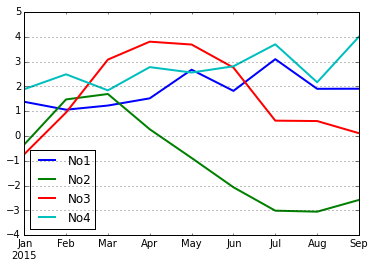

In [189]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

#### Series Class

In [190]:
type(df)

pandas.core.frame.DataFrame

In [191]:
df['No1']

2015-01-31    1.379943
2015-02-28   -0.319307
2015-03-31    0.167368
2015-04-30    0.290704
2015-05-31    1.153683
2015-06-30   -0.853121
2015-07-31    1.278497
2015-08-31   -1.195049
2015-09-30    0.003405
Freq: M, Name: No1, dtype: float64

In [192]:
type(df['No1'])

pandas.core.series.Series

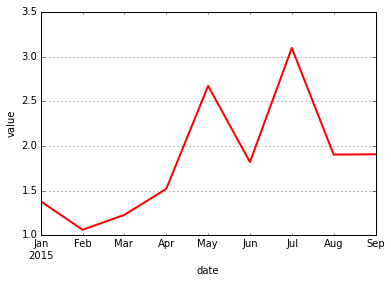

In [193]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2.)
plt.xlabel('date')
plt.ylabel('value')

#### GroupBy Operations

In [194]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,1.379943,-0.344468,-0.736452,1.886392,Q1
2015-02-28,-0.319307,1.818781,1.683143,0.600998,Q1
2015-03-31,0.167368,0.219119,2.134519,-0.647228,Q1
2015-04-30,0.290704,-1.421359,0.722336,0.937364,Q2
2015-05-31,1.153683,-1.157001,-0.115430,-0.218505,Q2
2015-06-30,-0.853121,-1.182478,-0.930000,0.252332,Q2
2015-07-31,1.278497,-0.943898,-2.139216,0.885864,Q3
2015-08-31,-1.195049,-0.039888,-0.016084,-1.530620,Q3
2015-09-30,0.003405,0.473229,-0.490152,1.840793,Q3


In [195]:
groups = df.groupby('Quarter')

In [196]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.409334,0.564477,1.027070,0.613387
Q2,0.197089,-1.253613,-0.107698,0.323730
Q3,0.028951,-0.170186,-0.881817,0.398679


In [197]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.379943,1.818781,2.134519,1.886392
Q2,1.153683,-1.157001,0.722336,0.937364
Q3,1.278497,0.473229,-0.016084,1.840793


In [198]:
groups.size()

Quarter
Q1         3
Q2         3
Q3         3
dtype: int64

In [199]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even','Odd', 'Even', 'Odd']

In [200]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [201]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [202]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.319307  1.818781  1.683143  0.600998
        Odd       0.773655 -0.062675  0.699033  0.619582
Q2      Even     -0.281209 -1.301919 -0.103832  0.594848
        Odd       1.153683 -1.157001 -0.115430 -0.218505
Q3      Even     -1.195049 -0.039888 -0.016084 -1.530620
        Odd       0.640951 -0.235335 -1.314684  1.363328

## Financial Data

In [203]:
import pandas.io.data as web

In [204]:
DAX = web.DataReader(name='^GDAXI',data_source='yahoo',start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3916 entries, 2000-01-03 00:00:00 to 2015-05-15 00:00:00
Data columns (total 6 columns):
Open         3916 non-null float64
High         3916 non-null float64
Low          3916 non-null float64
Close        3916 non-null float64
Volume       3916 non-null int64
Adj Close    3916 non-null float64
dtypes: float64(5), int64(1)

In [205]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-11,11674.51953,11702.12988,11622.01953,11673.34961,70980300,11673.34961
2015-05-12,11557.96973,11565.20020,11377.34961,11472.41016,101551000,11472.41016
2015-05-13,11532.96973,11596.46973,11301.62988,11351.45996,104879700,11351.45996
2015-05-14,11299.19043,11579.79980,11218.54004,11559.82031,70738400,11559.82031
2015-05-15,11593.20020,11632.36035,11383.23047,11447.03027,94826300,11447.03027


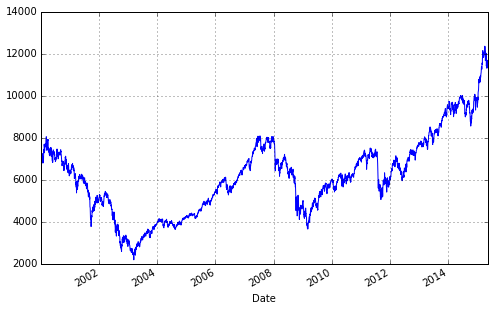

In [206]:
DAX['Close'].plot(figsize=(8, 5))

In [207]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /
                                DAX['Close'][i - 1])

Wall time: 671 ms


In [208]:
DAX[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-05-11,11673.34961,-0.003112
2015-05-12,11472.41016,-0.017363
2015-05-13,11351.45996,-0.010599
2015-05-14,11559.82031,0.018189
2015-05-15,11447.03027,-0.009805


In [209]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 0 ns


In [210]:
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-05-11,11673.34961,-0.003112,-0.003112
2015-05-12,11472.41016,-0.017363,-0.017363
2015-05-13,11351.45996,-0.010599,-0.010599
2015-05-14,11559.82031,0.018189,0.018189
2015-05-15,11447.03027,-0.009805,-0.009805


In [211]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D888CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EE064A8>], dtype=object)

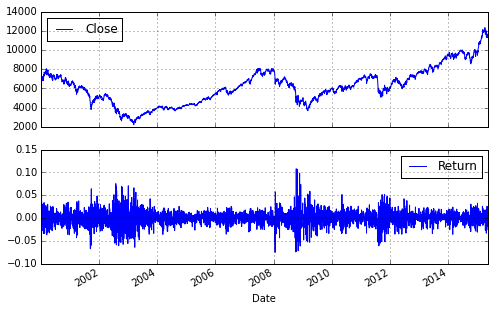

In [212]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',figsize=(8, 5))

In [213]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2015-05-11,11673.34961,11875.309757,10157.703203
2015-05-12,11472.41016,11874.643811,10164.726815
2015-05-13,11351.45996,11863.821662,10171.064236
2015-05-14,11559.82031,11858.117630,10178.228644
2015-05-15,11447.03027,11847.294295,10185.335709


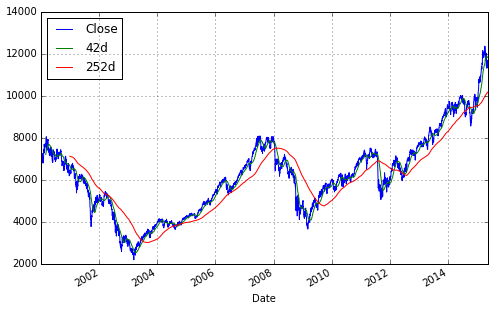

In [214]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5))

In [215]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
# moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E915CF8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F320B8>], dtype=object)

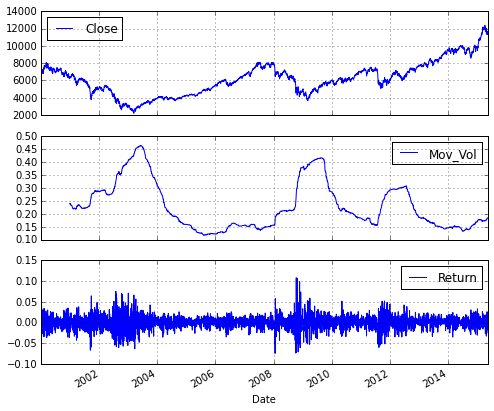

In [216]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',figsize=(8, 7))

## Regression Analysis

In [217]:
import pandas as pd
from urllib import urlretrieve

In [218]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

In [219]:
urlretrieve(es_url, 'C:/data/es.txt')  # path
urlretrieve(vs_url, 'C:/data/vs.txt')  # path

('C:/data/vs.txt', <httplib.HTTPMessage instance at 0x0000000011261488>)

In [220]:
!dir C:/data/*.txt
# Windows: use dir

매개 변수 형식이 틀립니다 - "data".


In [221]:
lines = open('C:/data/es.txt', 'r').readlines()
lines[:10]

['Price Indices - EURO Currency\n',
 'Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad\n',
 '        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic\n',
 '        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF\n',
 '31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56\n',
 '02.01.1987;770.89 ;  891.78 ;   82.57 ;   97.80 ;   97.43 ;   69.37 ;  647.62  ;  65.81\n',
 '05.01.1987;771.89 ;  898.33 ;   82.82 ;   98.60 ;   98.19 ;   69.16 ;  649.94  ;  65.82\n',
 '06.01.1987;775.92 ;  902.32 ;   83.28 ;   99.19 ;   98.83 ;   69.50 ;  652.49  ;  66.06\n',
 '07.01.1987;781.21 ;  899.15 ;   83.78 ;   98.96 ;   98.62 ;   70.59 ;  651.97  ;  66.20\n']

In [222]:
lines = [line.replace(' ','') for line in lines]   # Trimming inside
lines[:10]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n',
 '06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06\n',
 '07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20\n']

In [223]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [224]:
new_file = open('C:/data/es50.txt', 'w')    # opens a new file
new_file.writelines('date' + lines[3][:-1] + 'DEL' + lines[3][-1])

# writes the corrected third line of the original file
# as first line of new file

new_file.writelines(lines[4:])

# writes the remaining lines of the orignial file

new_file.close()

In [225]:
new_lines = open('C:/data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXFDEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [226]:
es = pd.read_csv('C:/data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)

CParserError: Error tokenizing data. C error: Expected 9 fields in line 3884, saw 10


In [227]:
np.round(es.tail())

NameError: name 'es' is not defined

In [228]:
del es['DEL']
es.info()

NameError: name 'es' is not defined

In [229]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF','SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,sep='', dayfirst=True, header=None,skiprows=4, names=cols)

TypeError: ord() expected a character, but string of length 0 found

In [ ]:
es.tail()

In [230]:
vs = pd.read_csv('C:/data/vs.txt', index_col=0, header=2,parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4167 entries, 1999-01-04 00:00:00 to 2015-05-15 00:00:00
Data columns (total 9 columns):
V2TX    4167 non-null float64
V6I1    3732 non-null float64
V6I2    4167 non-null float64
V6I3    4112 non-null float64
V6I4    4167 non-null float64
V6I5    4167 non-null float64
V6I6    4151 non-null float64
V6I7    4167 non-null float64
V6I8    4155 non-null float64
dtypes: float64(9)

In [231]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})

NameError: name 'es' is not defined

In [232]:
import datetime as dt
data = data.join(pd.DataFrame({'VSTOXX':vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

NameError: name 'data' is not defined

In [233]:
data = data.fillna(method='ffill')
data.info()

NameError: name 'data' is not defined

In [234]:
data.tail()

NameError: name 'data' is not defined

In [235]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

NameError: name 'data' is not defined

In [236]:
rets = np.log(data / data.shift(1))
rets.head()

NameError: name 'data' is not defined

In [237]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

NameError: name 'rets' is not defined

In [238]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model

NameError: name 'rets' is not defined

In [239]:
model.beta

NameError: name 'model' is not defined

In [240]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

NameError: name 'xdat' is not defined

In [241]:
rets.corr()

NameError: name 'rets' is not defined

In [242]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
window=252).plot(grid=True, style='b')

NameError: name 'rets' is not defined

## High-Frequency Data

In [243]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [244]:
url1 = 'http://hopey.netfonds.no/posdump.php?'
url2 = 'date=%s%s%s&paper=AAPL.O&csv_format=csv'
url = url1 + url2

In [245]:
year = '2014'
month = '09'
days = ['22', '23', '24', '25']
# dates might need to be updated

In [246]:
AAPL = pd.DataFrame()
for day in days:
    AAPL = AAPL.append(pd.read_csv(url % (year, month, day),index_col=0, header=0, parse_dates=True))
AAPL.columns = ['bid', 'bdepth', 'bdeptht','offer', 'odepth', 'odeptht']
# shorter colummn names

CParserError: Passed header=0 but only 0 lines in file

In [ ]:
AAPL.info()

In [247]:
AAPL[‘bid'].plot()

SyntaxError: invalid syntax (<ipython-input-247-3614cd545dcc>, line 1)

In [248]:
to_plot = AAPL[['bid', 'bdeptht']][
    (AAPL.index > dt.datetime(2014, 9, 22, 0, 0))
&   (AAPL.index < dt.datetime(2014, 9, 23, 2, 59))]
# adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5))

KeyError: "['bid' 'bdeptht'] not in index"

In [249]:
AAPL_resam = AAPL.resample(rule='5min', how='mean')
np.round(AAPL_resam.head(), 2)

""


In [250]:
AAPL_resam['bid'].fillna(method='ffill').plot()

KeyError: 'bid'

In [251]:
def reversal(x):
    return 2 * 95 - x

In [252]:
!rm C:/data/*
# Windows: del /data/*

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## Conclusions

Financial time series data is one of the most common and important forms of data in
finance. The library pandas is generally the tool of choice when it comes to working with
such data sets. Modeled after the data.frame class of R, the pandas DataFrame class
provides a wealth of attributes and methods to attack almost any kind of (financial)
analytics problem you might face. Convenience is another benefit of using pandas: even if
you might be able to generate the same result by using NumPy and/or matplotlib only,
pandas generally has some neat shortcuts based on a powerful and flexible API.
In addition, pandas makes it really easy to retrieve data from a variety of web sources, like
Yahoo! Finance or Google. Compared to “pure” NumPy or matplotlib, it automates the
management of financial time series data in many respects and also provides higher
flexibility when it comes to combining data sets and enlarging existing ones.